# Trabalho Final - Machine Learning

* BONG - RM359114
* PAULA - RM359240
* ROBERTO - RM359038


Neste trabalho, como parte do time de analistas da Quantum Finance, vocês deverão explorar uma base de dados originalmente utilizada para classificação de score de crédito, disponível no Kaggle (https://www.kaggle.com/datasets/parisrohan/credit-score-classification), utilizando técnicas de Análise Exploratória de Dados (EDA) e algoritmos de Machine Learning supervisionados.


O objetivo é aplicar e interpretar os resultados obtidos, assim como criar um sistema que gere valor a partir da análise da base de dados.

**Modelo de Classificação Supervisionada**


Desenvolver um modelo de classificação supervisionada para prever a classificação de crédito dos indivíduos presentes na base.


Passos esperados:

1. Realizar uma análise exploratória dos dados (EDA) para entender as características principais da base e as relações entre variáveis; 2 pontos

2. Implementar um pipeline de modelo de classificação usando Random Forest, XGBoost e LightGBM. Use GridSearch para otimizar os parametros de cada modelo; 4 pontos

3. Avaliar os resultados utilizando a métrica mais adequada e **justifique** sua escolha; 2 pontos

4. Apresentar os resultados, indicando a métrica no conjunto de treino (train.csv) e explicar como o modelo pode ser utilizado para decisões financeiras. 2 pontos


Entregáveis:

1. Este jupyter notebook executado e com os resultados aparentes (não serão aceitoa outros formatos)

#INICIO

###**1. Preparação do Ambiente e Carregamento dos Dados**

#### Primeiro, vamos importar as bibliotecas necessárias e carregar os dados usando o kagglehub.

In [7]:
# Célula 1: Instalação de bibliotecas (se necessário, execute uma vez e comente depois)
!pip install kagglehub[pandas-datasets] pandas numpy scikit-learn xgboost lightgbm matplotlib seaborn

# Célula 2: Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Desabilitar warnings para uma saída mais limpa (opcional)
import warnings
warnings.filterwarnings('ignore')

# Configurações visuais para plots (opcional)
plt.style.use('ggplot')
sns.set_palette('viridis')

# Célula 3: Carregamento do Dataset via Kaggle Hub
print("Carregando dataset 'parisrohan/credit-score-classification' do Kaggle Hub...")
# Set the path to the file you'd like to load (train.csv is the main training file for this dataset)
file_path = "train.csv"

# Load the latest version
# Corrected call to load_dataset by passing the file_path as a positional argument
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "parisrohan/credit-score-classification",
  file_path  # Pass file_path as a positional argument
)

print("Dataset carregado com sucesso!")
print("Primeiras 5 linhas do dataset:")
print(df.head())
print("\nInformações do dataset:")
df.info()

Carregando dataset 'parisrohan/credit-score-classification' do Kaggle Hub...
Dataset carregado com sucesso!
Primeiras 5 linhas do dataset:
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...      

###**1. Análise Exploratória de Dados (EDA)**

#### Nesta seção, vamos explorar os dados para entender suas características.

O dataset possui 100000 linhas e 28 colunas.

Descrição estatística das colunas numéricas:
       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000        

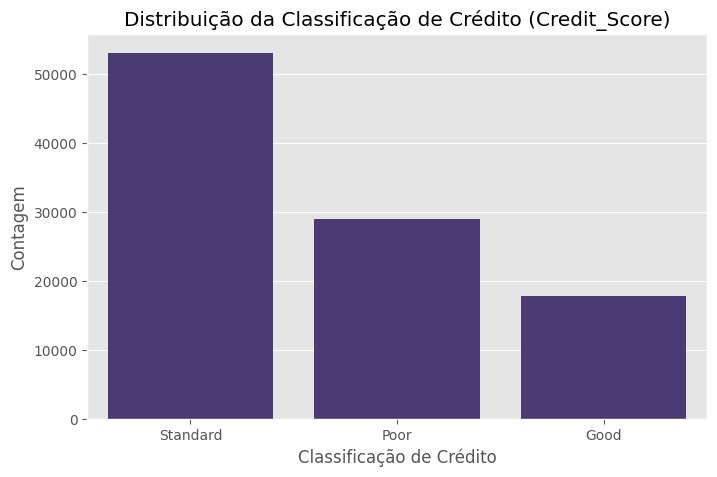


Distribuição da variável alvo:
Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64

Colunas Numéricas (features): ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
Colunas Categóricas (features): ['Month', 'Age', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']

Distribuição de colunas numéricas por Score de Crédito:


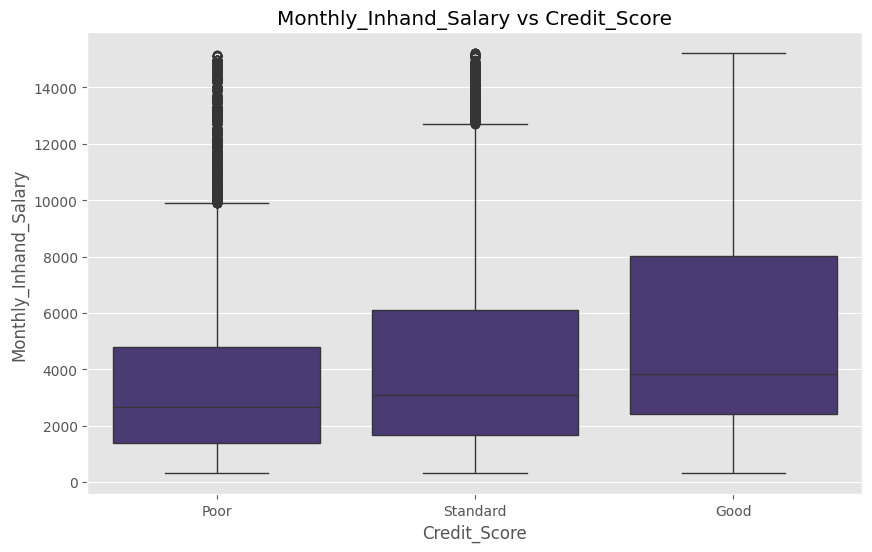

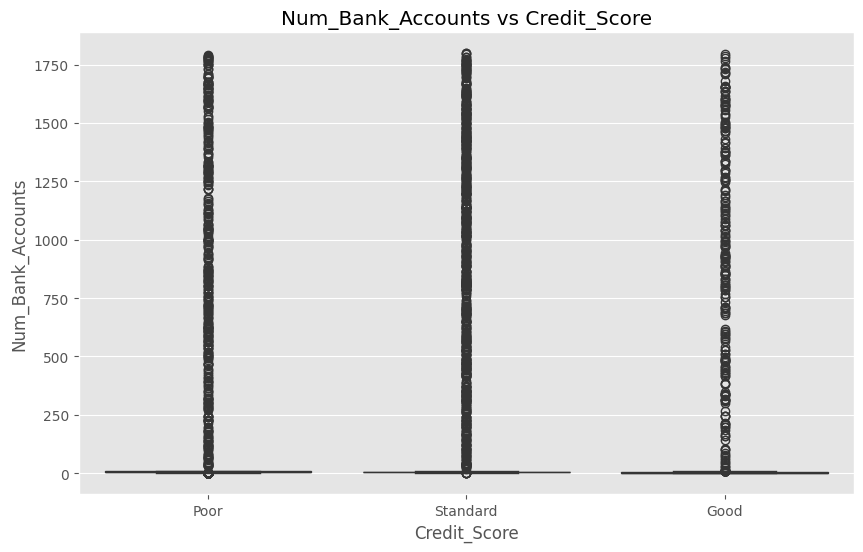

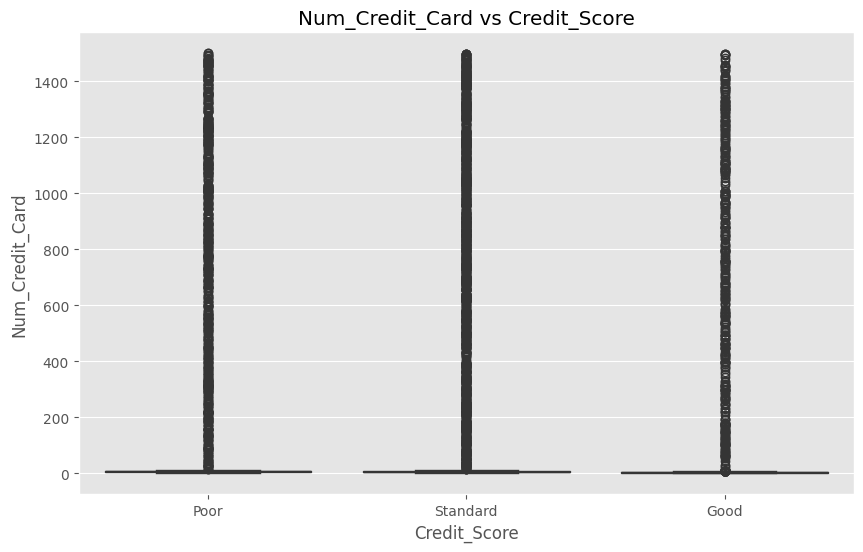

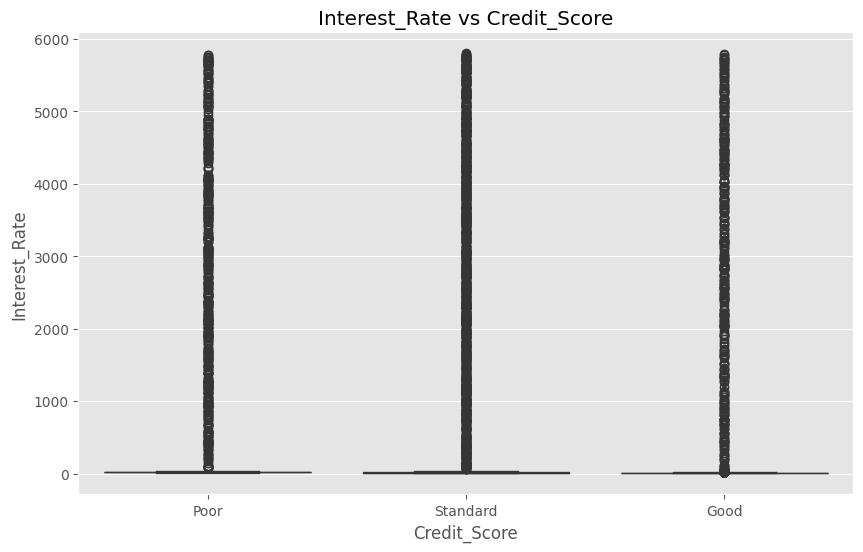

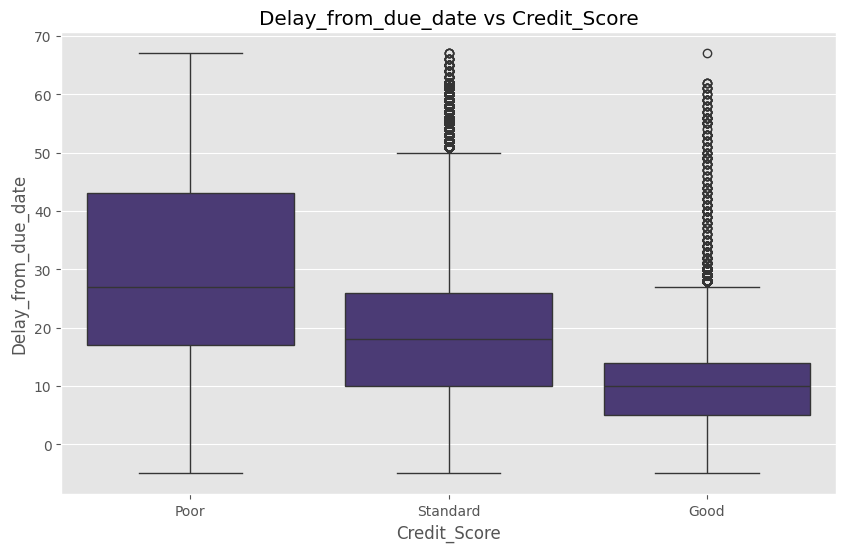

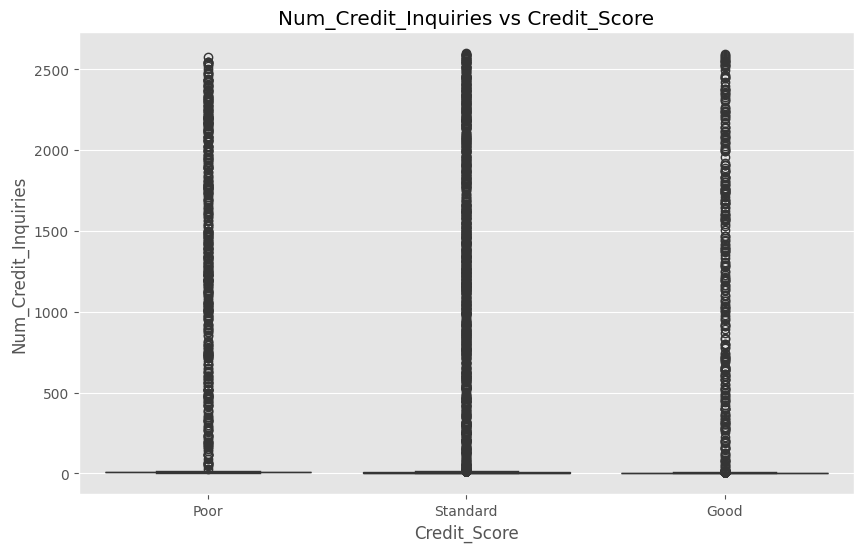

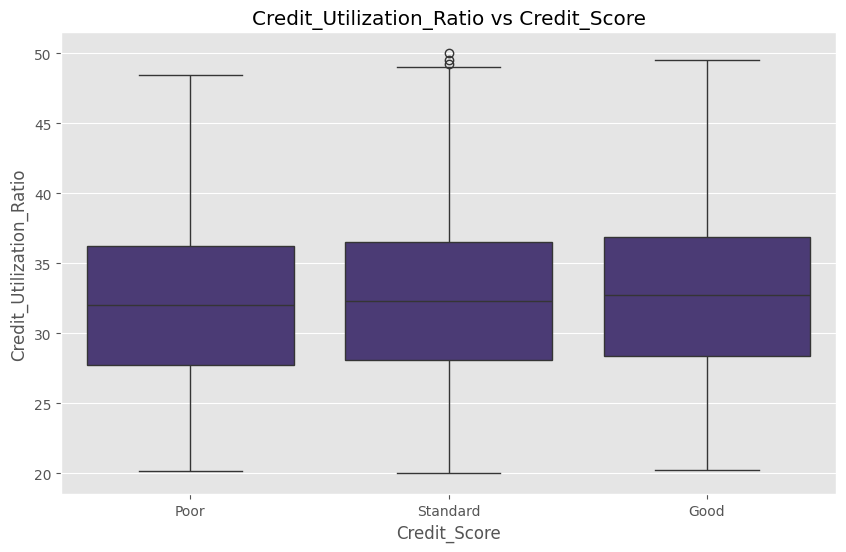

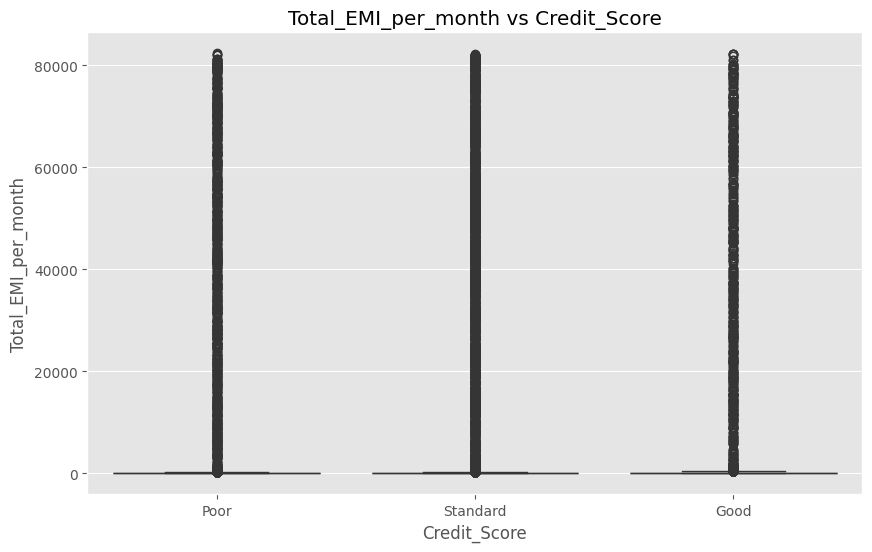


Distribuição de colunas categóricas por Score de Crédito:


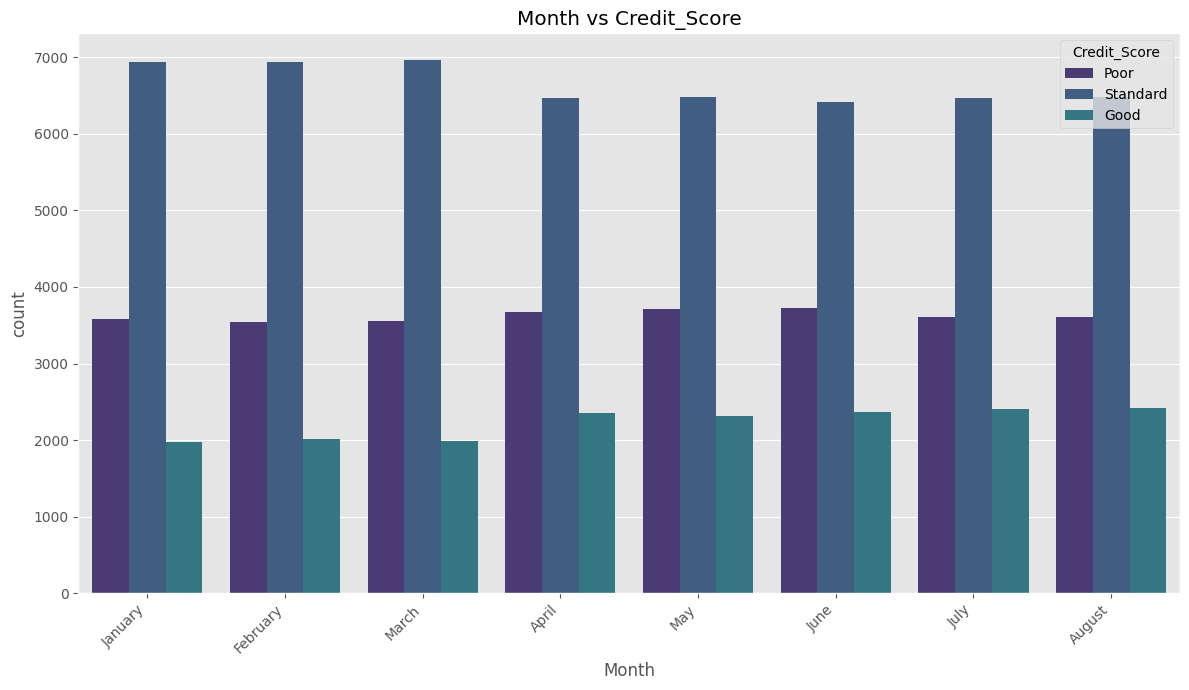

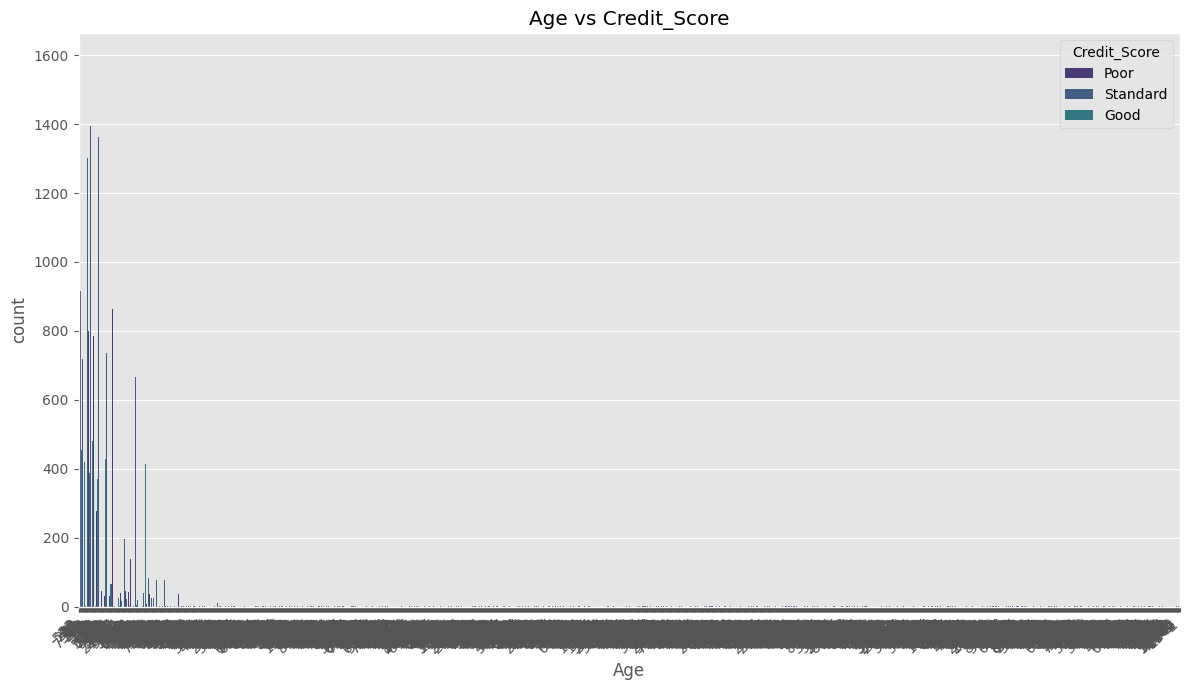

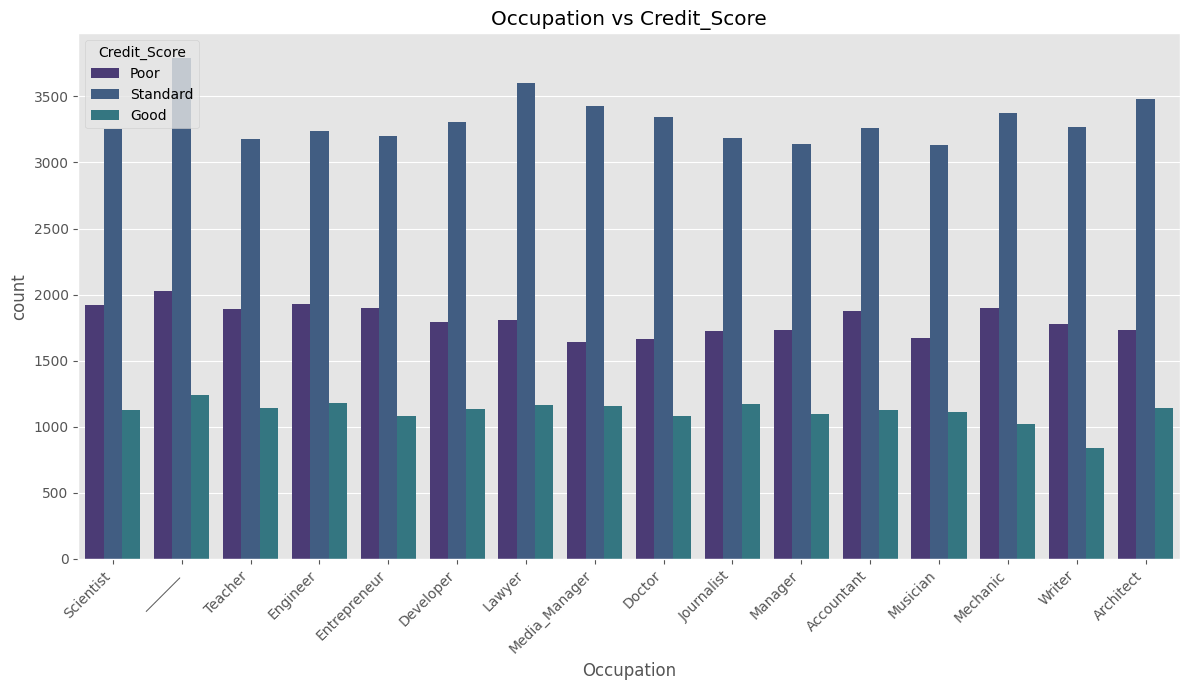

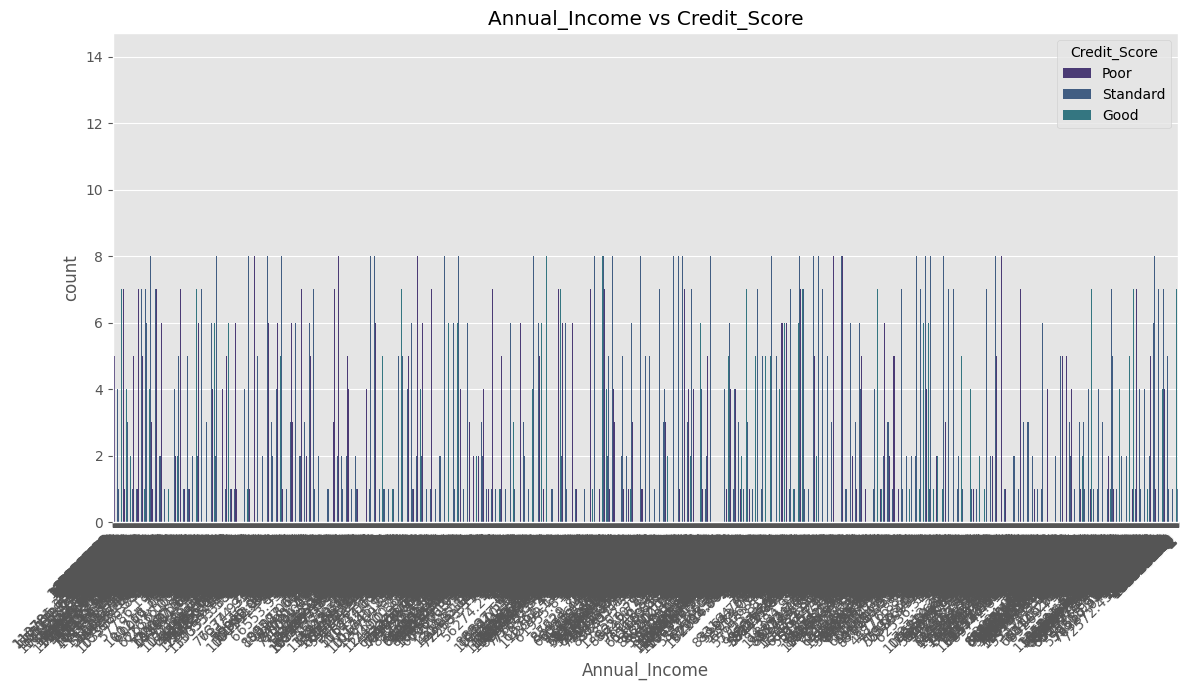

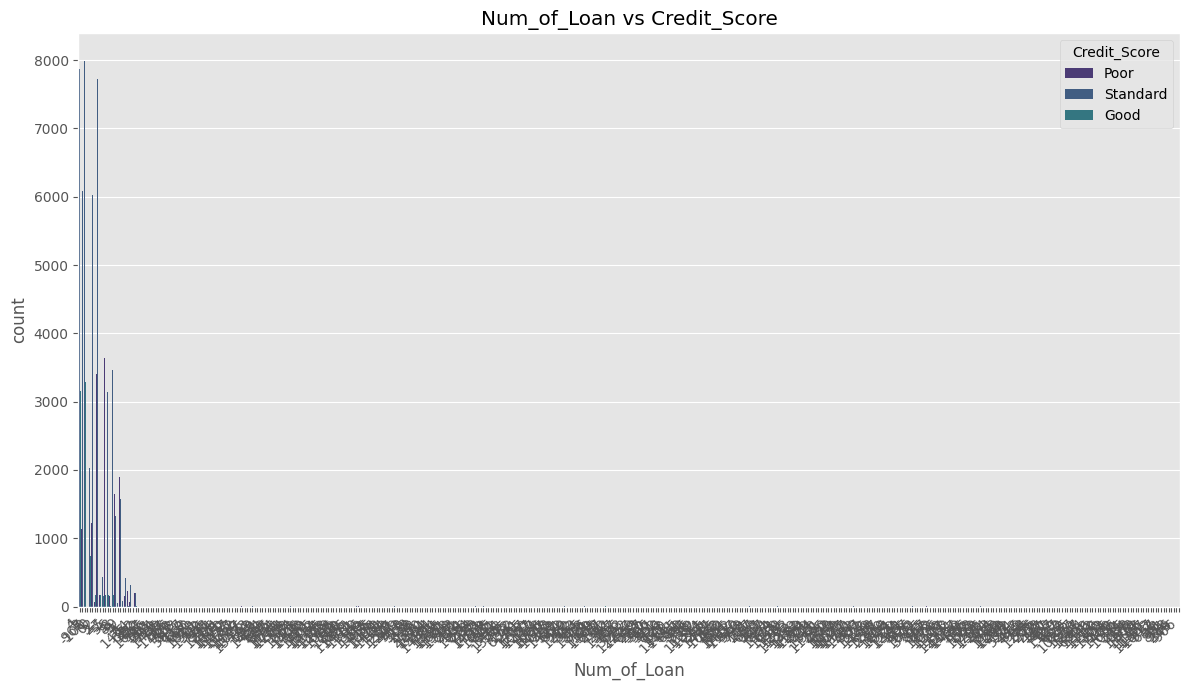

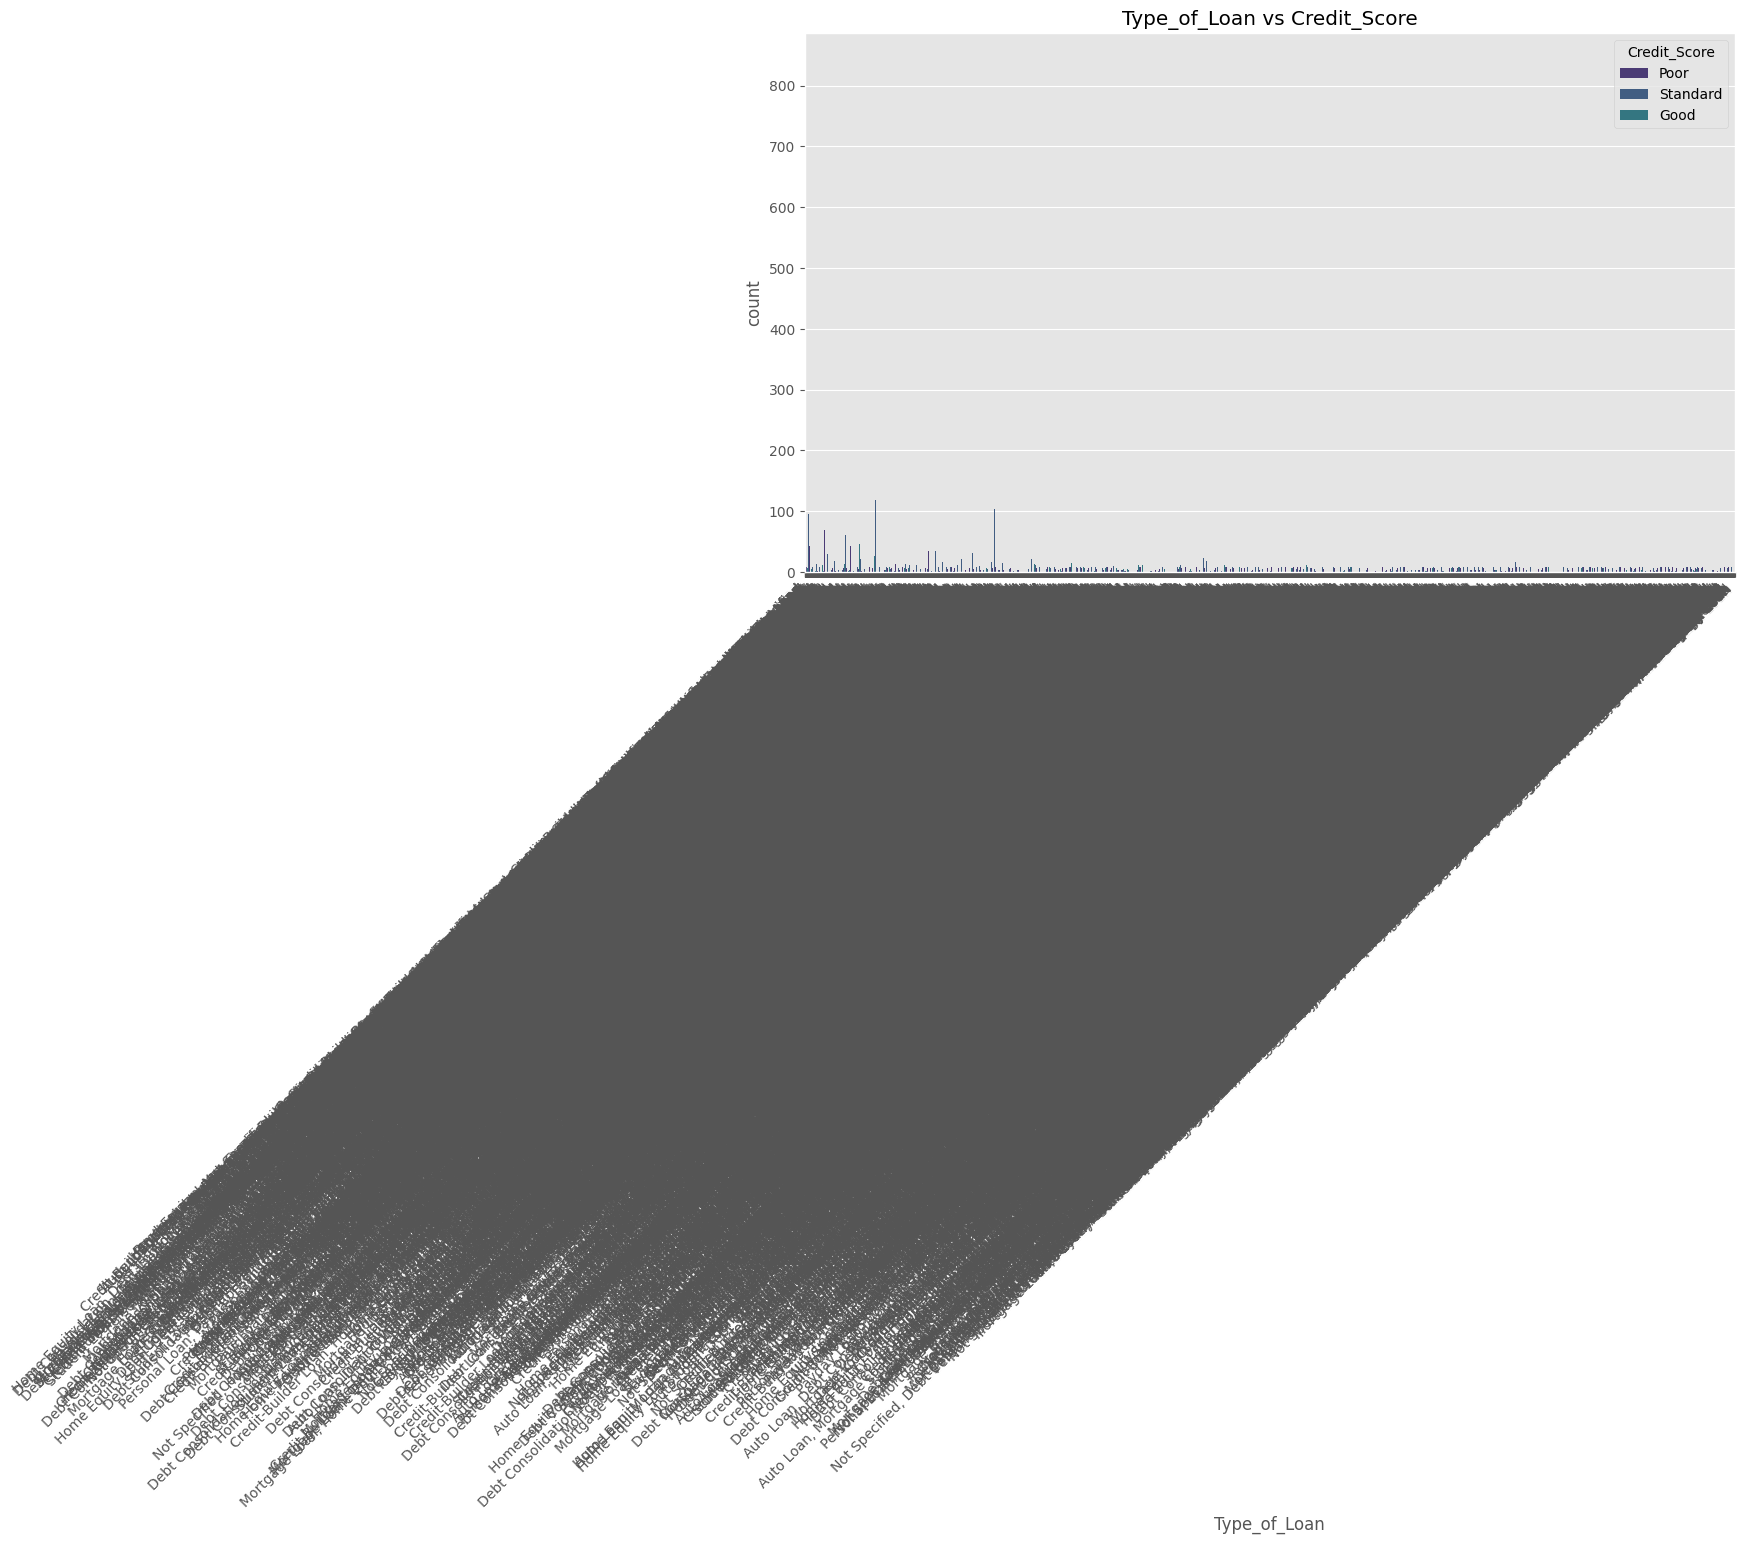

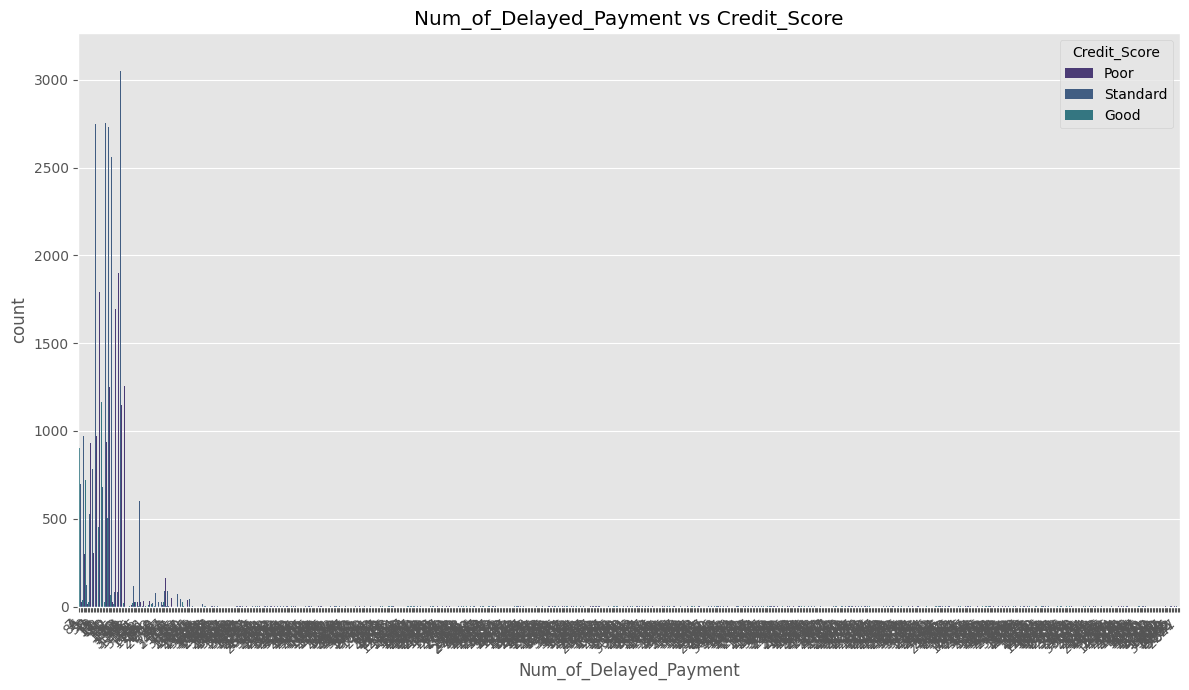

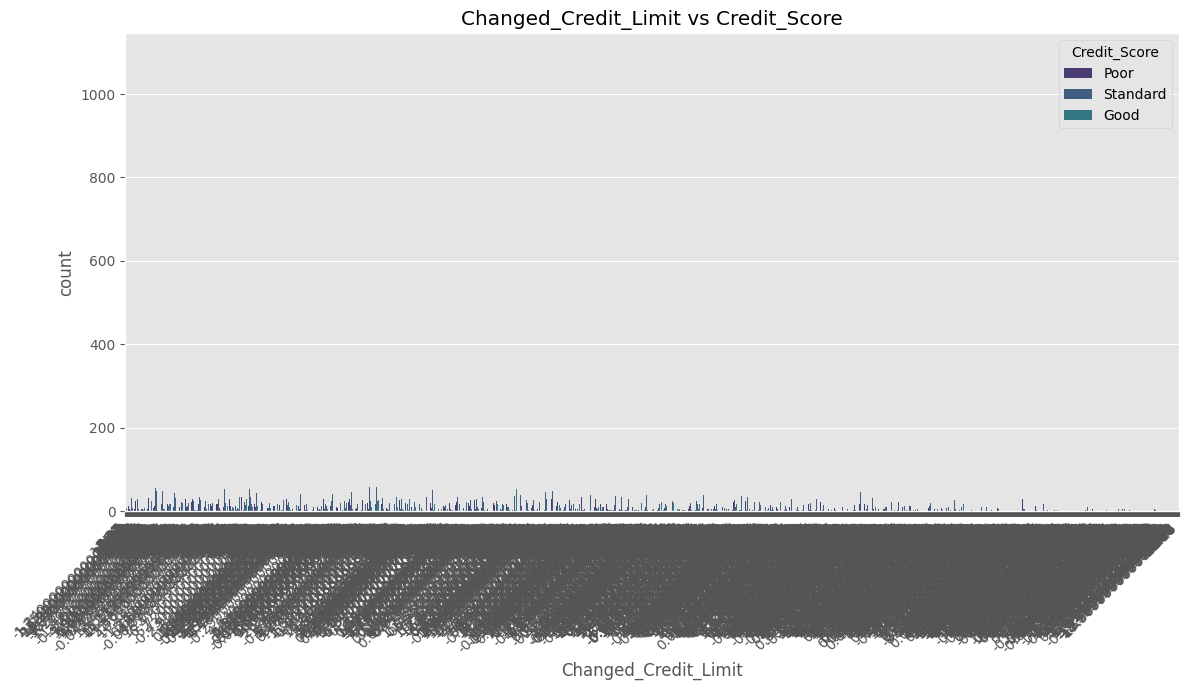

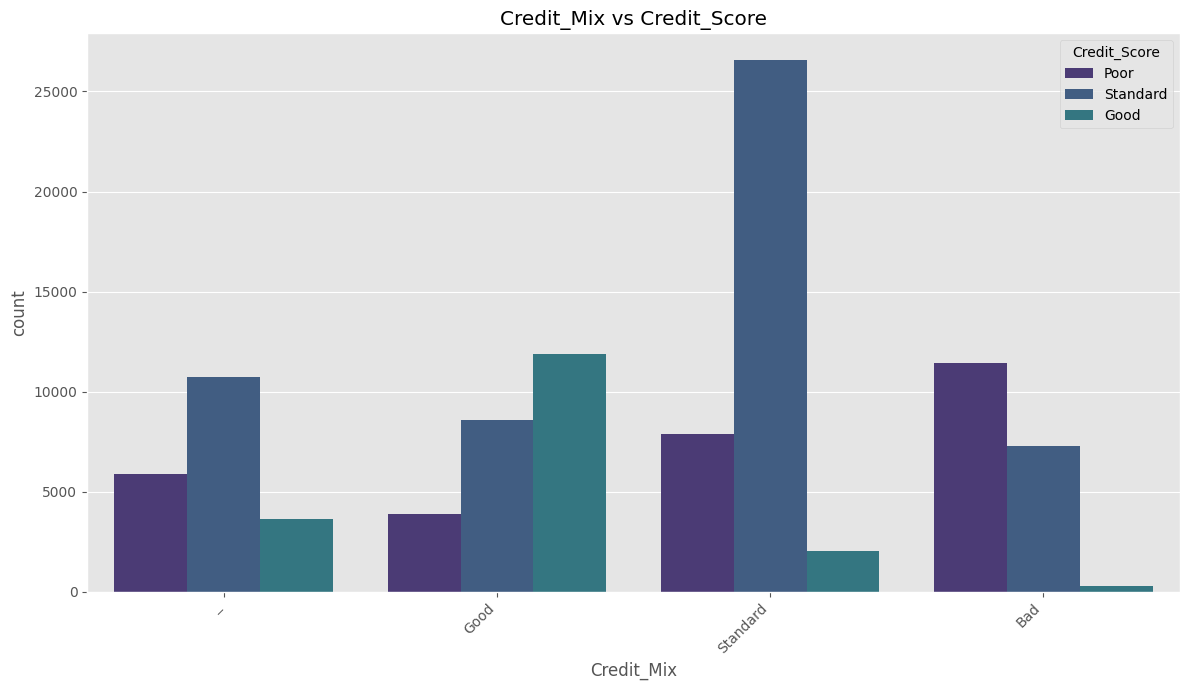

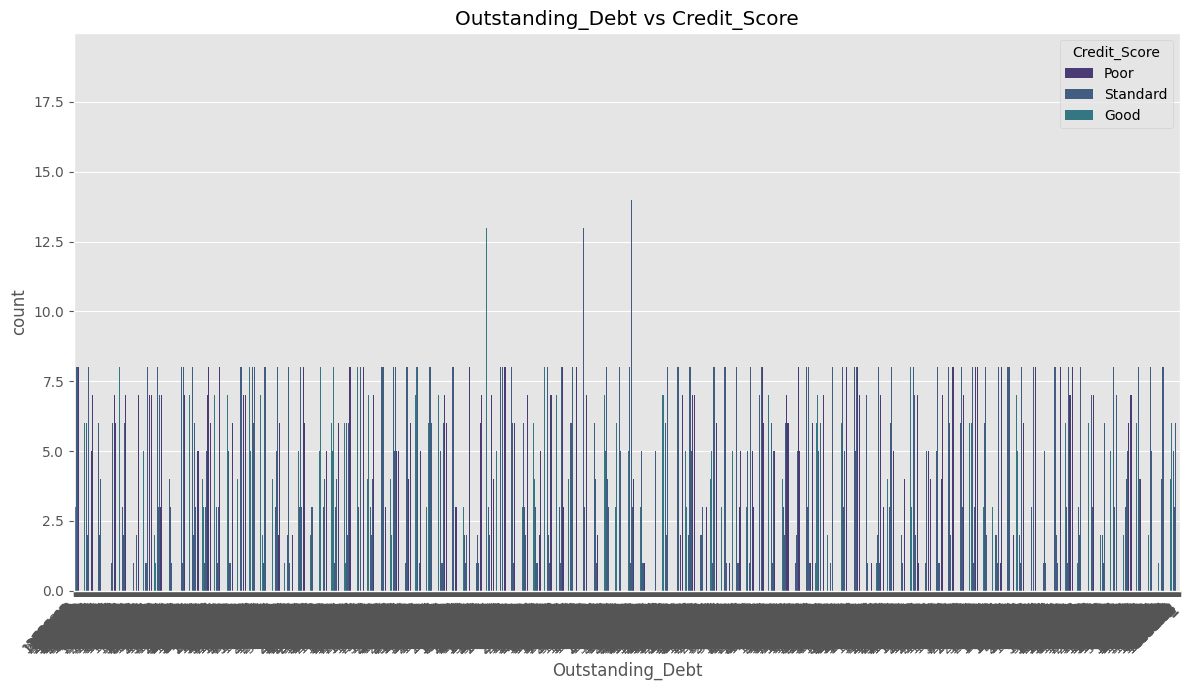

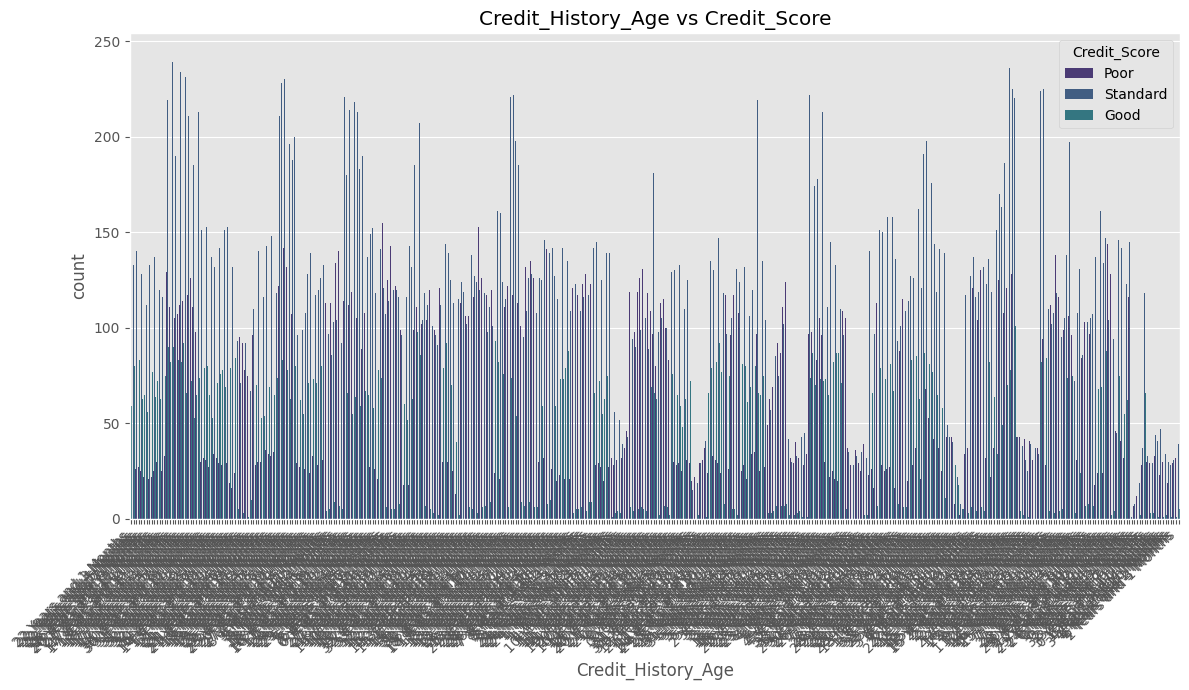

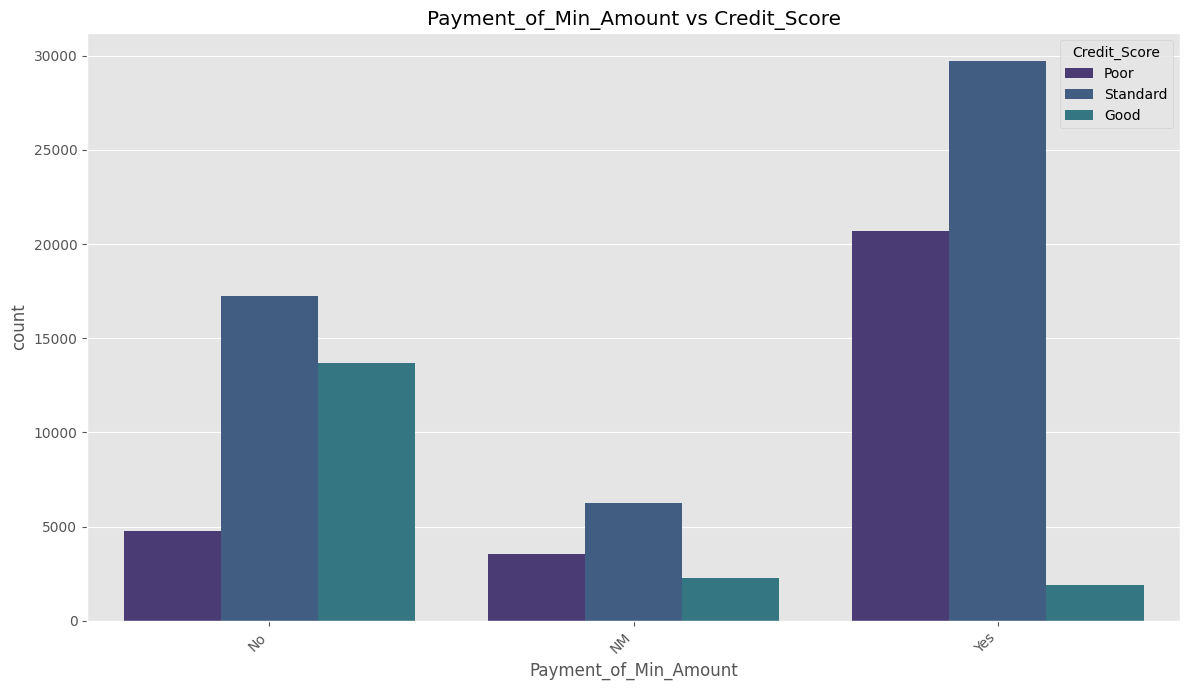

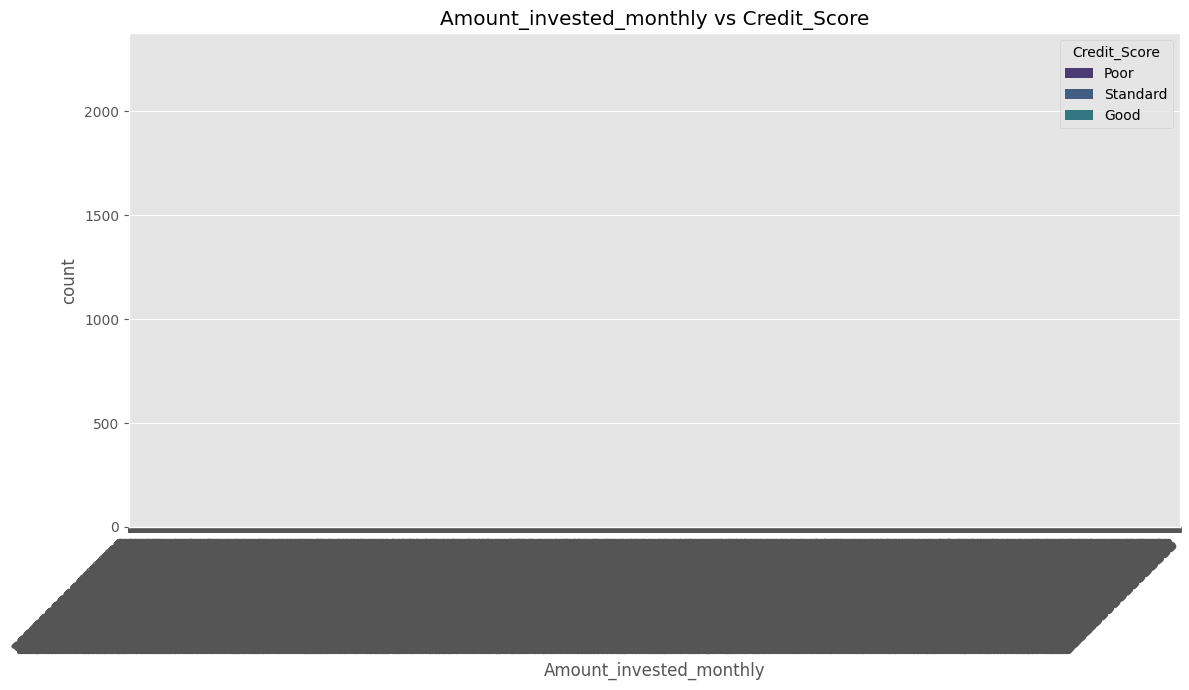

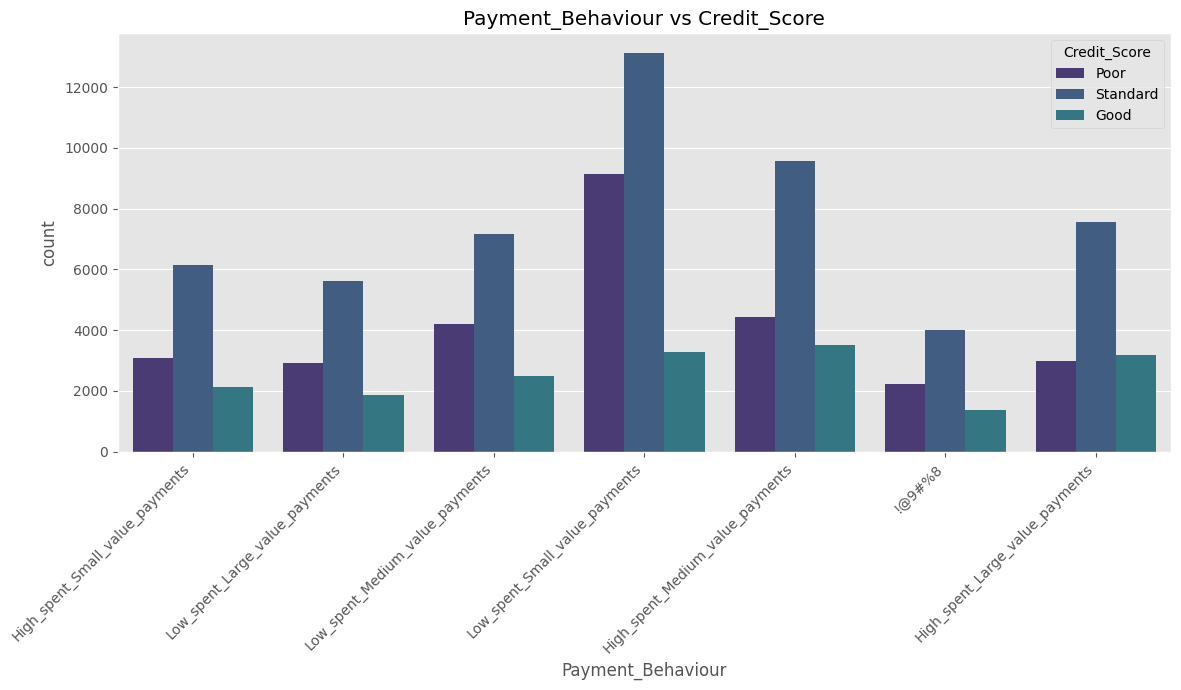

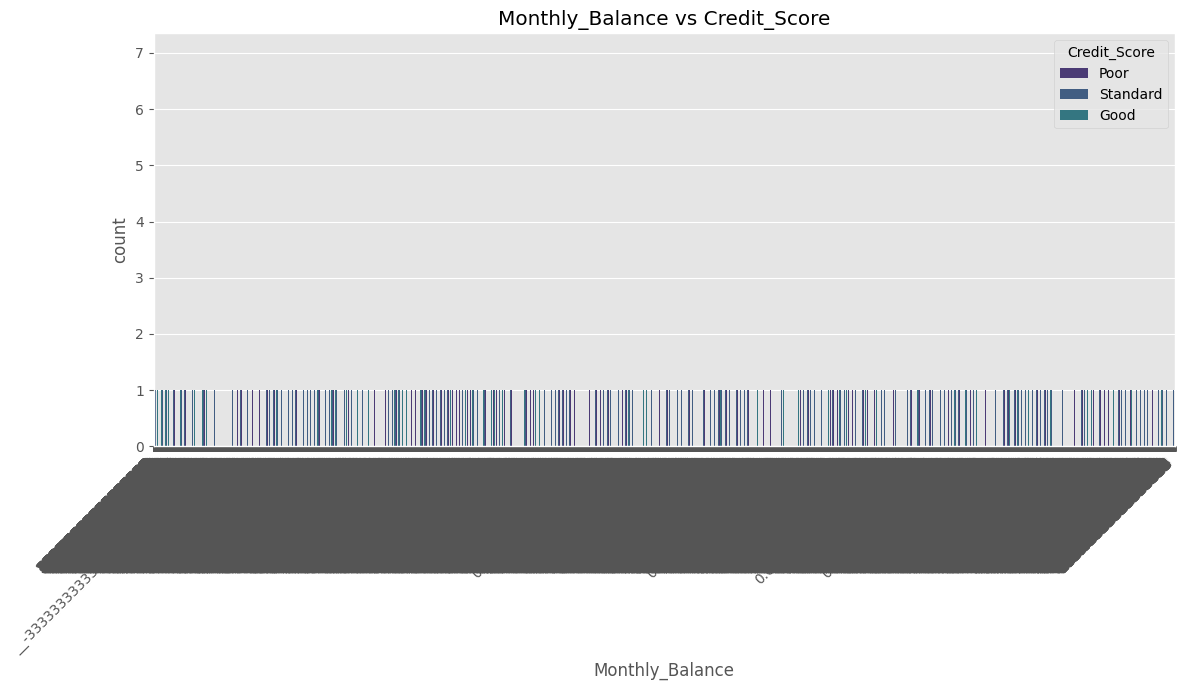

Valores únicos em 'Month' antes da limpeza (amostra): ['January' 'February' 'March' 'April' 'May']
Valores únicos em 'Age' antes da limpeza (amostra): ['23' '-500' '28_' '28' '34']
Valores únicos em 'Occupation' antes da limpeza (amostra): ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur']
Valores únicos em 'Annual_Income' antes da limpeza (amostra): ['19114.12' '34847.84' '34847.84_' '143162.64' '30689.89']
Valores únicos em 'Num_of_Loan' antes da limpeza (amostra): ['4' '1' '3' '967' '-100']
Valores únicos em 'Type_of_Loan' antes da limpeza (amostra): ['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified'
 'Not Specified' nan]
Valores únicos em 'Num_of_Delayed_Payment' antes da limpeza (amostra): ['7' nan '4' '8_' '6']
Valores únicos em 'Changed_Credit_Limit' antes da limpeza (amostra): ['11.27' '_' '6.27' '9.27' '5.42']
Valores únicos em 'Credit_Mix' antes da limpeza (amostra): ['_' 'Good' 'Sta

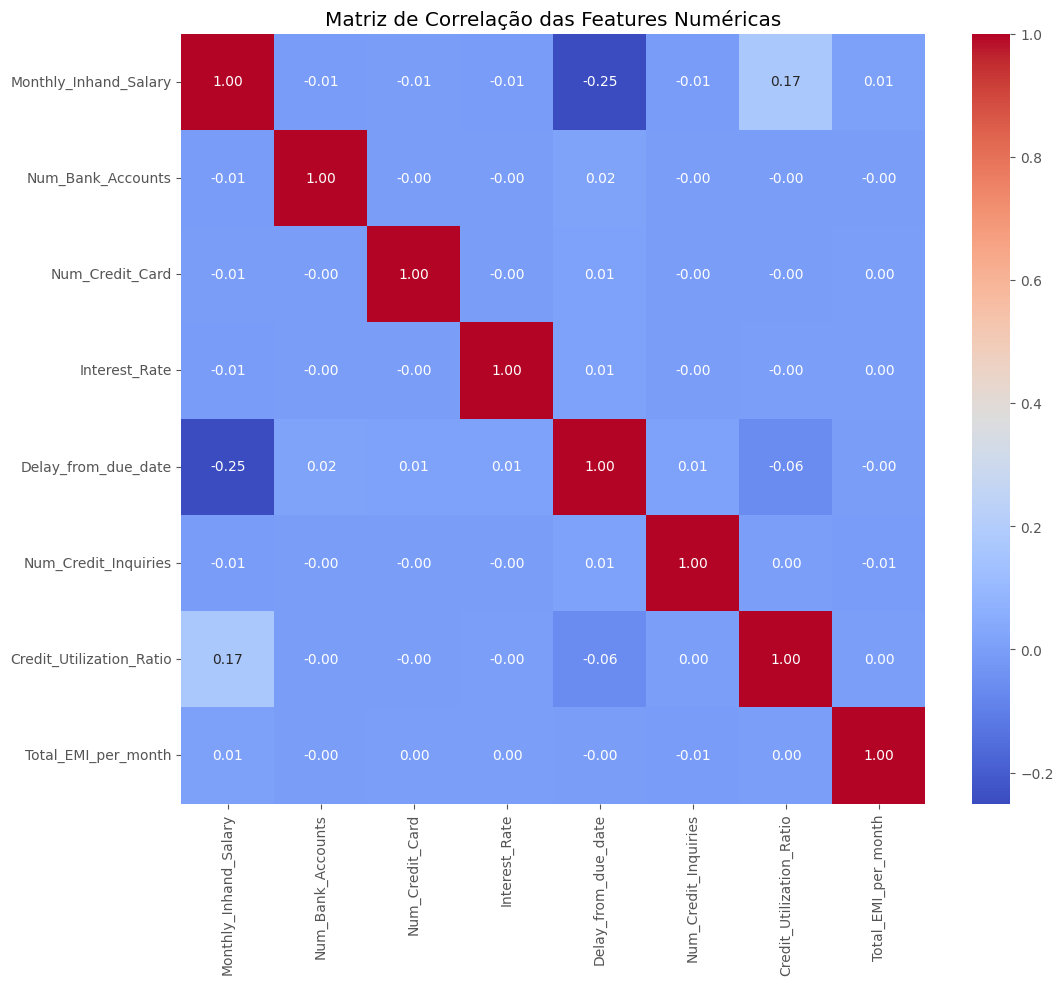

In [8]:
# Célula 4: Dimensões do dataset
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

# Célula 5: Descrição estatística dos dados numéricos
print("\nDescrição estatística das colunas numéricas:")
print(df.describe())

# Célula 6: Descrição das colunas categóricas
print("\nDescrição estatística das colunas categóricas:")
print(df.describe(include=['object']))

# Célula 7: Verificação de valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())
# Se houver muitos valores ausentes em uma coluna, precisaremos decidir como tratá-los.
# Para este dataset, a saída do Kaggle indica que geralmente não há muitos nulos, mas é bom verificar.

# Célula 8: Visualização da distribuição da variável alvo 'Credit_Score'
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit_Score', data=df, order = df['Credit_Score'].value_counts().index)
plt.title('Distribuição da Classificação de Crédito (Credit_Score)')
plt.xlabel('Classificação de Crédito')
plt.ylabel('Contagem')
plt.show()
print("\nDistribuição da variável alvo:")
print(df['Credit_Score'].value_counts(normalize=True) * 100)

# Célula 9: Identificar colunas numéricas e categóricas (excluindo IDs e a alvo)
# ID, Customer_ID, Name, SSN não são features úteis para modelagem direta.
# Month também é categórico. Type_of_Loan pode precisar de tratamento.
cols_to_drop_eda = ['ID', 'Customer_ID', 'Name', 'SSN'] # Colunas a serem removidas antes da modelagem
df_eda = df.drop(columns=cols_to_drop_eda, errors='ignore')

numerical_cols = df_eda.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_eda.select_dtypes(include='object').columns.tolist()
if 'Credit_Score' in categorical_cols:
    categorical_cols.remove('Credit_Score') # Remover a variável alvo da lista de features categóricas

print(f"\nColunas Numéricas (features): {numerical_cols}")
print(f"Colunas Categóricas (features): {categorical_cols}")

# Célula 10: Visualização de colunas numéricas em relação à variável alvo
if numerical_cols: # Apenas plotar se houver colunas numéricas identificadas
    print("\nDistribuição de colunas numéricas por Score de Crédito:")
    for col in numerical_cols:
        if col != 'Credit_Score': # Evitar plotar a alvo contra ela mesma se for numérica
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='Credit_Score', y=col, data=df_eda, order=['Poor', 'Standard', 'Good'])
            plt.title(f'{col} vs Credit_Score')
            plt.show()
else:
    print("\nNenhuma coluna numérica (feature) identificada para plotagem com boxplot.")


# Célula 11: Visualização de colunas categóricas em relação à variável alvo
if categorical_cols:
    print("\nDistribuição de colunas categóricas por Score de Crédito:")
    for col in categorical_cols:
        plt.figure(figsize=(12, 7))
        sns.countplot(x=col, hue='Credit_Score', data=df_eda, hue_order=['Poor', 'Standard', 'Good'])
        plt.title(f'{col} vs Credit_Score')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
else:
    print("\nNenhuma coluna categórica (feature) identificada para plotagem com countplot.")

# Célula 12: Limpeza de dados (exemplo: remover '_' de strings se necessário)
# Algumas colunas como 'Payment_Behaviour' podem ter valores como '__10000__'. Vamos limpar.
# Esta é uma suposição comum, verifique os valores únicos para confirmar a necessidade.
for col in categorical_cols:
    if df_eda[col].dtype == 'object':
        # Exemplo: df_eda[col] = df_eda[col].str.replace('_', '').str.strip()
        # Verifique os valores únicos antes de aplicar tal limpeza.
        print(f"Valores únicos em '{col}' antes da limpeza (amostra): {df_eda[col].unique()[:5]}")
        # Se a limpeza for complexa, pode ser necessário um tratamento mais específico.
        # Para este dataset, 'Payment_of_Min_Amount' e 'Payment_Behaviour' podem ter valores como "Yes", "No", ou prefixos/sufixos.
        # 'Type_of_Loan' pode ter múltiplas entradas.

# 'Type_of_Loan' é uma coluna que frequentemente precisa de tratamento especial, pois pode conter listas de empréstimos.
# Se 'Type_of_Loan' for uma string com múltiplos empréstimos separados por vírgula,
# uma estratégia é contar o número de empréstimos ou usar MultiLabelBinarizer/TF-IDF.
# Por simplicidade aqui, vamos tratar como categórica, mas na prática exigiria mais atenção.
if 'Type_of_Loan' in df_eda.columns:
    print("\nValores únicos em 'Type_of_Loan' (amostra):")
    print(df_eda['Type_of_Loan'].value_counts().head())
    # Exemplo de tratamento simples: número de empréstimos
    # df_eda['Num_Loans'] = df_eda['Type_of_Loan'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
    # numerical_cols.append('Num_Loans')
    # if 'Type_of_Loan' in categorical_cols: categorical_cols.remove('Type_of_Loan')

# Nota: A coluna 'Month' também é categórica e pode ser útil.
# 'Occupation' também.

# Célula 13: Matriz de Correlação para features numéricas (se houver suficientes)
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df_eda[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlação das Features Numéricas')
    plt.show()
else:
    print("\nNão há features numéricas suficientes para uma matriz de correlação significativa.")

###**Comentários sobre a EDA:**

####O dataset "Credit Score Classification" possui várias colunas categóricas e numéricas.
Colunas como ID, Customer_ID, Name, SSN geralmente não são usadas como features diretas para modelagem e devem ser removidas.
A variável alvo Credit_Score é categórica ('Good', 'Standard', 'Poor'). É importante verificar seu balanceamento.
Algumas colunas podem precisar de limpeza (ex: Amount_invested_monthly, Monthly_Balance podem ter caracteres não numéricos se não forem carregadas corretamente como float; Payment_Behaviour pode ter valores como '_Low_spent_Small_value_payments_'). O kagglehub geralmente lida bem com tipos, mas é bom inspecionar. A coluna Type_of_Loan é particularmente complexa, pois pode conter múltiplos empréstimos por cliente; um tratamento mais avançado (como contar o número de empréstimos ou usar técnicas de binarização de múltiplas labels) poderia ser feito, mas para este escopo, trataremos como uma categórica simples ou contaremos os empréstimos.
A EDA visual ajuda a entender as relações entre as features e a classificação de crédito.

###**Pré-processamento dos Dados**
####Preparamos os dados para os modelos de Machine Learning.



In [10]:
# Célula 14: Preparação final do DataFrame para modelagem
# Remover colunas de identificação que não serão usadas
cols_to_drop_model = ['ID', 'Customer_ID', 'Name', 'SSN']
df_model = df.drop(columns=cols_to_drop_model, errors='ignore')

# Lidar com valores infinitos ou muito grandes que podem surgir de dados ruins ou cálculos
# Substituir inf por NaN, depois tratar NaN
df_model.replace([np.inf, -np.inf], np.nan, inplace=True)

# Identificar features (X) e alvo (y)
X = df_model.drop('Credit_Score', axis=1)
y = df_model['Credit_Score']

# Codificar a variável alvo
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("\nClasses da variável alvo e sua codificação:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name}: {i}")


# Célula 15: Identificar colunas numéricas e categóricas para o pré-processamento
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nFeatures Numéricas para pré-processamento: {numerical_features}")
print(f"Features Categóricas para pré-processamento: {categorical_features}")

# Importar SimpleImputer ANTES de ser usado
from sklearn.impute import SimpleImputer

# Célula 16: Criar pipelines de pré-processamento
# Para features numéricas: imputar média (ou mediana) e escalar
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Usar SimpleImputer de sklearn.impute
    ('scaler', StandardScaler())
])

# Para features categóricas: imputar a mais frequente e aplicar One-Hot Encoding
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Usar SimpleImputer de sklearn.impute
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # sparse_output=False para facilitar
])

# Combinar pipelines usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough' # Mantém colunas não especificadas (se houver)
)

# Remove the redundant re-definition of the pipelines
# Importar SimpleImputer
# from sklearn.impute import SimpleImputer

# Atualizar pipelines com SimpleImputer
# numerical_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# categorical_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_pipeline, numerical_features),
#         ('cat', categorical_pipeline, categorical_features)
#     ],
#     remainder='passthrough'
# )


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"\nFormato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_test: {y_test.shape}")


Classes da variável alvo e sua codificação:
Good: 0
Poor: 1
Standard: 2

Features Numéricas para pré-processamento: ['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']
Features Categóricas para pré-processamento: ['Month', 'Age', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']

Formato de X_train: (80000, 23)
Formato de X_test: (20000, 23)
Formato de y_train: (80000,)
Formato de y_test: (20000,)


###**2. Implementação do Pipeline de Modelos com GridSearch**

####Vamos treinar Random Forest, XGBoost e LightGBM, otimizando seus hiperparâmetros.



In [11]:
# Célula 18: Definir modelos e seus espaços de parâmetros para GridSearch

# --- Random Forest ---
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced')) # class_weight para lidar com desbalanceamento
])
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1) # f1_macro é bom para multi-classe desbalanceada

# --- XGBoost ---
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')) # eval_metric para suprimir warning
])
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1]
}
grid_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)

# --- LightGBM ---
pipeline_lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, class_weight='balanced')) # class_weight para lidar com desbalanceamento
])
param_grid_lgbm = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [-1, 10, 20], # -1 é sem limite
    'classifier__learning_rate': [0.01, 0.1]
}
grid_lgbm = GridSearchCV(pipeline_lgbm, param_grid_lgbm, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)

# Célula 19: Treinar os modelos
print("\nIniciando treinamento do Random Forest com GridSearchCV...")
grid_rf.fit(X_train, y_train)
print("Melhores parâmetros para Random Forest:", grid_rf.best_params_)
print(f"Melhor F1-macro (CV) para Random Forest: {grid_rf.best_score_:.4f}")

print("\nIniciando treinamento do XGBoost com GridSearchCV...")
grid_xgb.fit(X_train, y_train)
print("Melhores parâmetros para XGBoost:", grid_xgb.best_params_)
print(f"Melhor F1-macro (CV) para XGBoost: {grid_xgb.best_score_:.4f}")

print("\nIniciando treinamento do LightGBM com GridSearchCV...")
grid_lgbm.fit(X_train, y_train)
print("Melhores parâmetros para LightGBM:", grid_lgbm.best_params_)
print(f"Melhor F1-macro (CV) para LightGBM: {grid_lgbm.best_score_:.4f}")

# Salvar os melhores estimadores
best_rf = grid_rf.best_estimator_
best_xgb = grid_xgb.best_estimator_
best_lgbm = grid_lgbm.best_estimator_



Iniciando treinamento do Random Forest com GridSearchCV...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


ValueError: 
All the 36 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_encode.py", line 183, in _unique_python
    uniques = sorted(uniques_set)
              ^^^^^^^^^^^^^^^^^^^
TypeError: '<' not supported between instances of 'str' and 'float'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 1001, in fit_transform
    result = self._call_func_on_transformers(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 910, in _call_func_on_transformers
    return Parallel(n_jobs=self.n_jobs)(jobs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 77, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/parallel.py", line 1985, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/parallel.py", line 1913, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 139, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 730, in fit_transform
    return last_step.fit_transform(
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py", line 991, in fit
    self._fit(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py", line 103, in _fit
    result = _unique(Xi, return_counts=compute_counts)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_encode.py", line 52, in _unique
    return _unique_python(
           ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_encode.py", line 188, in _unique_python
    raise TypeError(
TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'str']

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 1001, in fit_transform
    result = self._call_func_on_transformers(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py", line 910, in _call_func_on_transformers
    return Parallel(n_jobs=self.n_jobs)(jobs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 77, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/parallel.py", line 1985, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/parallel.py", line 1913, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 139, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 718, in fit_transform
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py", line 451, in fit
    self.statistics_ = self._dense_fit(
                       ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py", line 563, in _dense_fit
    most_frequent[i] = _most_frequent(row, np.nan, 0)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py", line 53, in _most_frequent
    most_frequent_value = min(
                          ^^^^
TypeError: '<' not supported between instances of 'float' and 'str'


###**3. Avaliação dos Resultados**
####Vamos avaliar os modelos no conjunto de teste.

###**Justificativa da Métrica de Avaliação:**

#### Para um problema de classificação de score de crédito, onde as classes ('Poor', 'Standard', 'Good') podem estar desbalanceadas e o custo de classificar erroneamente um cliente 'Poor' como 'Good' (ou vice-versa) pode ser alto, a acurácia sozinha pode não ser a melhor métrica.
#### Utilizaremos o F1-score (macro average) como principal métrica de avaliação durante o GridSearch e para comparação. O F1-score é a média harmônica da precisão e do recall, fornecendo uma boa medida de desempenho quando há desbalanceamento de classes. A média 'macro' calcula o F1 para cada classe e depois tira a média, tratando todas as classes igualmente.
####Adicionalmente, apresentaremos a matriz de confusão para entender os tipos de erros que cada modelo comete e o classification report completo (precisão, recall, f1-score por classe).

In [ ]:
# Célula 20: Avaliação dos modelos no conjunto de teste

models = {
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "LightGBM": best_lgbm
}

results_summary = {}

for model_name, model in models.items():
    print(f"\n--- Avaliação do {model_name} ---")
    y_pred = model.predict(X_test)

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro_val = f1_score(y_test, y_pred, average='macro') # A métrica usada no GridSearch

    print(f"Acurácia no teste: {accuracy:.4f}")
    print(f"F1-score (macro) no teste: {f1_macro_val:.4f}")

    print("\nRelatório de Classificação:")
    # Usar target_names para o relatório
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    results_summary[model_name] = {'Accuracy': accuracy, 'F1 Macro': f1_macro_val}

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.show()

# Célula 21: Sumário dos resultados
print("\n--- Sumário dos Resultados (Métricas no Conjunto de Teste) ---")
results_df = pd.DataFrame(results_summary).T.sort_values(by='F1 Macro', ascending=False)
print(results_df)

best_overall_model_name = results_df.index[0]
best_overall_model = models[best_overall_model_name]
print(f"\nO melhor modelo geral baseado no F1-score (macro) no conjunto de teste é: {best_overall_model_name}")

###**4. Apresentação dos Resultados e Interpretação Financeira**

#### Apresentar os resultados (métrica no conjunto de treino) e explicar como o modelo pode ser utilizado para decisões financeiras.


###**Métrica no "Conjunto de Treino (train.csv)":**

####Conforme o enunciado "Apresentar os resultados, indicando a métrica no conjunto de treino (train.csv)", isso pode ser interpretado de algumas formas:

####A métrica obtida no subconjunto de teste (X_test, y_test) que foi derivado do train.csv original. Esta é a prática padrão para avaliar a generalização do modelo. As métricas acima (Célula 20 e 21) já cumprem isso.

####A métrica obtida ao re-treinar o melhor modelo em TODO o train.csv e depois avaliá-lo nesse mesmo conjunto completo. Isso mostraria o quão bem o modelo se ajusta aos dados de treinamento, mas não é uma medida de generalização.

####A métrica obtida no subconjunto de treinamento (X_train, y_train) usado para treinar.

####Vamos apresentar a métrica F1-Macro no subconjunto de teste (X_test, y_test) como a principal métrica de desempenho representativa do train.csv, pois reflete a capacidade de generalização do modelo em dados não vistos dentro do contexto do arquivo train.csv.

In [ ]:
# Célula 22: Apresentação da métrica principal para o melhor modelo
print(f"\n--- Resultado para o Melhor Modelo ({best_overall_model_name}) ---")

# A métrica principal escolhida foi F1-score (macro)
best_model_f1_macro_test = results_df.loc[best_overall_model_name, 'F1 Macro']
print(f"A métrica F1-score (macro) do modelo '{best_overall_model_name}' no conjunto de teste (derivado do train.csv) é: {best_model_f1_macro_test:.4f}")

# Se for explicitamente necessário mostrar a métrica no conjunto de TREINAMENTO (X_train, y_train) para o melhor modelo:
y_pred_train_best_model = best_overall_model.predict(X_train)
f1_macro_train_best_model = f1_score(y_train, y_pred_train_best_model, average='macro')
print(f"A métrica F1-score (macro) do modelo '{best_overall_model_name}' no conjunto de TREINAMENTO (X_train) é: {f1_macro_train_best_model:.4f}")
print("(Esta métrica no conjunto de treinamento tende a ser mais alta e indica o quão bem o modelo se ajustou aos dados de treino, não necessariamente sua capacidade de generalização.)")

###**Como o modelo pode ser utilizado para decisões financeiras:**

###O modelo de classificação de score de crédito desenvolvido pode agregar valor significativo à Quantum Finance de diversas maneiras

####**Automatização da Avaliação de Risco de Crédito:**

####O modelo pode processar rapidamente as informações de novos solicitantes de crédito e fornecer uma classificação de risco ('Poor', 'Standard', 'Good'). Isso acelera o processo de aprovação e reduz a necessidade de análise manual extensiva para todos os casos.

###**Decisões de Concessão de Crédito Mais Precisas:**
####Clientes 'Good': Podem ser rapidamente aprovados para empréstimos, cartões de crédito ou outros produtos financeiros, possivelmente com limites mais altos e taxas de juros mais favoráveis, melhorando a experiência do cliente e aumentando a carteira de clientes de baixo risco.

###**Clientes 'Standard':**
####Podem ser aprovados com condições padrão, ou podem ser submetidos a uma análise um pouco mais detalhada para definir limites e taxas adequados.

###**Clientes 'Poor':**
####As solicitações podem ser recusadas para mitigar perdas por inadimplência, ou podem ser oferecidos produtos com condições mais restritivas (limites baixos, taxas mais altas, garantias) ou programas de educação financeira para ajudar a melhorar seu score futuro.

###**Precificação Baseada em Risco:**

####As taxas de juros e outras condições contratuais podem ser ajustadas de acordo com o score de crédito previsto. Clientes com menor risco (score 'Good') pagariam taxas menores, enquanto clientes com maior risco (score 'Poor') pagariam taxas maiores para compensar o risco adicional.

###**Gestão de Carteira de Clientes Existentes:**

####O modelo pode ser usado para reavaliar periodicamente o score de crédito de clientes existentes. Isso pode ajudar a identificar clientes cujo risco aumentou (exigindo monitoramento ou ajuste de limite) ou diminuiu (possibilitando ofertas de upgrade de produtos ou melhores condições).

###**Marketing e Ofertas Direcionadas:**
####Clientes com score 'Good' ou 'Standard' podem ser alvos de campanhas de marketing para novos produtos financeiros, enquanto clientes com score 'Poor' podem receber ofertas de produtos que os ajudem a construir ou reconstruir seu crédito.

###**Redução de Perdas por Inadimplência (Provisões):**

#### Ao prever com maior precisão o risco de crédito, a instituição pode otimizar suas provisões para devedores duvidosos (PDD), alinhando-as de forma mais eficaz com o risco real da carteira.

###**Identificação de Features Relevantes:**

####Analisando a importância das features no modelo (especialmente em Random Forest, XGBoost, LightGBM), a Quantum Finance pode entender melhor quais fatores são mais preditivos do score de crédito. Essa informação pode ser usada para refinar políticas de crédito e aconselhamento financeiro. Por exemplo, se 'Payment_Behaviour' ou 'Outstanding_Debt' são altamente preditivos, a empresa pode focar em educar os clientes sobre a importância de pagamentos pontuais e gerenciamento de dívidas.

###**Considerações Éticas e Regulatórias:**
####É crucial que o uso do modelo seja transparente, justo e em conformidade com as regulações financeiras. O modelo não deve discriminar com base em características protegidas, e deve haver mecanismos para que os clientes entendam as decisões e possam contestá-las, se necessário. A explicabilidade do modelo (por exemplo, usando SHAP values com XGBoost ou LightGBM) pode ser importante aqui.